# Insurance Premium Prediction using Linear Models

## Problem Statement

> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [Insurance CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
>
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


## 1. Importing Data

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import zipfile
from urllib.request import urlretrieve
from pathlib import Path

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

In [2]:
medical_df = pd.read_csv("D:\Education\Data Analysis\Python\ML Projects\Insurance Premium Prediction using Scikit Learn\medical-charges.csv")

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Before we start making predictions, let's analyze the dataset. It contains 1338 rows and 7 columns, with each row representing a customer's personal details who has previously purchased insurance from the company. The dataset includes the following attributes: age, sex, BMI, number of children, smoking status, region, and charges.

Our objective is to predict the "charges" column using the other columns as input features. If we can accurately predict charges for the historical data, we can use the same method to estimate charges for new customers based on their personal information.

Let's examine the data present in each of the columns.

## 2. Exploratory Data Analysis and Visualization

1. **Age**  
   - **Type**: Integer  
   - **Description**: Represents the age of the individual.  
   - **Range**: 18 to 64 years  
2. **Sex**  
   - **Type**: Categorical (object)  
   - **Description**: Gender of the individual.  
   - **Values**: `male`, `female`  
3. **BMI**  
   - **Type**: Float  
   - **Description**: Body Mass Index (BMI) is a measure of body fat based on height and weight.  
   - **Range**: Approximately 16.00 to 53.1  
4. **Children**  
   - **Type**: Integer  
   - **Description**: Number of children or dependents the individual has.  
   - **Range**: 0 to 5  
5. **Smoker**  
   - **Type**: Categorical (object)  
   - **Description**: Indicates if the individual is a smoker.  
   - **Values**: `yes`, `no`  
6. **Region**  
   - **Type**: Categorical (object)  
   - **Description**: The geographical region where the individual resides.  
   - **Values**: `northeast`, `northwest`, `southeast`, `southwest`  
7. **Charges**  
   - **Type**: Float  
   - **Description**: The insurance cost incurred by the individual.  
   - **Range**: Approximately 1121.87 to 63770.43

In [4]:
medical_df.shape

(1338, 7)

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like Columns "age", "children", "bmi" and "charges" have Numerical Data, whereas columns "sex", "smoker" and "region" have categorical data.

Here are some statistics for the numerical columns:

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
print(medical_df.sex.unique())
print(medical_df.smoker.unique())
print(medical_df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [8]:
medical_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Check Missing Values

In [9]:
medical_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the data set.

Check Duplicate Rows 

In [10]:
print(f"Number of duplicated rows: {medical_df.duplicated().sum()}")

Number of duplicated rows: 1


In [11]:
print(f"Display duplicated rows along with index")
medical_df[medical_df.duplicated(keep=False)]

Display duplicated rows along with index


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


- But as we understand each row is an individual person and it is possible that two people could have similar characteristics. So, we will not drop the duplicates.

Categorising column types

In [12]:
# define numerical & categorical columns
numerical_features = [feature for feature in medical_df.columns if pd.api.types.is_numeric_dtype(medical_df[feature])]

discrete_numerical_features = [feature for feature in numerical_features if medical_df[feature].nunique() < 20]

continuous_numerical_features = [feature for feature in numerical_features if medical_df[feature].nunique() >= 20]

categorical_features = [feature for feature in medical_df.columns if medical_df[feature].dtype == 'object']

# print column names
print(f'There are {len(numerical_features)} numerical features : {numerical_features}')
print(f'\nThere are {len(discrete_numerical_features)} discrete numerical features : {discrete_numerical_features}')
print(f'\nThere are {len(continuous_numerical_features)} continuos numerical features : {continuous_numerical_features}')
print(f'\nThere are {len(categorical_features)} categorical features : {categorical_features}')

There are 4 numerical features : ['age', 'bmi', 'children', 'charges']

There are 1 discrete numerical features : ['children']

There are 3 continuos numerical features : ['age', 'bmi', 'charges']

There are 3 categorical features : ['sex', 'smoker', 'region']


Check skewness of the data

In [13]:
for feature in continuous_numerical_features:
    skewness = medical_df[feature].skew()
    if abs(skewness) > 1:
        print(f"'{feature}' is highly skewed with skewness: {skewness:.2f}")

'charges' is highly skewed with skewness: 1.52


Outlier detection

In [14]:
# Calculate IQR for each numerical feature
Q1 = medical_df[continuous_numerical_features].quantile(0.25)
Q3 = medical_df[continuous_numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
outliers = ((medical_df[continuous_numerical_features] < (Q1 - 1.5 * IQR)) | (medical_df[continuous_numerical_features] > (Q3 + 1.5 * IQR)))

outlier_rows = medical_df[outliers.any(axis=1)]  # This will show the rows with outliers
print(outlier_rows.head(5))


    age     sex    bmi  children smoker     region     charges
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768
29   31    male  36.30         2    yes  southwest  38711.0000
30   22    male  35.60         0    yes  southwest  35585.5760


Observations:

1. The minimum medical expense of a person is around $1100. For the general population the expenditure is low. We have an outlier with $64K.
2. The "charges" column seems to be significantly skewed to the right as the median << maximum & mean >> median

In [15]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Univariate Analysis

#### Age Column

The youngest person is 18 years old and the oldest is 64. There are 47 unique ages. Thus, we can visualize the distribution of age using a histogram and a box plot.

In [17]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

We can see that a lot of young people are buying health insurance. This could be due to increased awareness among young people. Otherwise the distribution appears relatively uniform, with no significant skewness or outliers. This suggests that the dataset contains a good representation of different age groups.

In [18]:
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Distribution of Age') # every age has one bar associated to it, no grouping
fig.update_layout(bargap=0.1)
fig.show()

**Non smokers (with insurance) live longer than smokers (with insurance) 🤔🙃**

In [19]:
mean_age_smoker = medical_df.groupby('smoker')['age'].mean()
print(mean_age_smoker)

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64


In [20]:
colors = {
    'yes': 'red',
    'no': 'green'
}
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box', color = medical_df['smoker'], color_discrete_map = colors,
                   nbins= 47, barmode='group', opacity = 0.85) # every age has two bars associated to it split by smoker and non-smoker
fig.update_layout(
    bargap = 0.1,
    title = 'Distribution of age across smokers and non-smokers',
    xaxis_title = 'Age',
    yaxis_title = 'Count of people')
fig.show()

**Women (with insurance) live longer than men (with insurance) 😏😂**

In [21]:
medical_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
colors = {
    'male': 'blue',
    'female': 'pink'
}
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box', color = medical_df['sex'], color_discrete_map = colors,
                   nbins= 47, barmode='group', opacity = 0.85) # every age has two bars associated to it split by male and female
fig.update_layout(
    bargap = 0.1,
    title = 'Distribution of age across males and females',
    xaxis_title = 'Age',
    yaxis_title = 'Count of people')
fig.show()

#### Body Mass Index Column

The measurements of body mass index seem to form a normal distribution centered around the value 30, with a few outliers towards the right (Red dots seen to the right of the upper fence)

A healthy body mass index (BMI) for adults is **between 18.5 and 24.9**:

- **Underweight**: BMI is below 18.5  
- **Healthy weight**: BMI is between 18.5 and 24.9  
- **Overweight**: BMI is between 25.0 and 29.9  
- **Obesity**: BMI is 30.0 or greater  
- **Severe obesity**: BMI is 40 or greater

**Most of the customers are unfit!** There are 222 coustomers with a healthy BMI which makes 16.59% of the population.


In [23]:
healthy_bmi_count = medical_df[(medical_df['bmi'] >= 18.5) & (medical_df['bmi'] <= 24.9)].shape[0]
print(f"Count of customers with a healthy BMI between 18.5 and 24.9: {healthy_bmi_count}")

Count of customers with a healthy BMI between 18.5 and 24.9: 222


In [24]:
total_customers = medical_df.shape[0]
percentage = (healthy_bmi_count / total_customers) * 100
print(f"Percentage of customers with a healthy BMI between 18.5 and 24.9: {percentage:.2f}%")

Percentage of customers with a healthy BMI between 18.5 and 24.9: 16.59%


In [25]:
obese_bmi_count = medical_df[medical_df['bmi'] >= 30].shape[0]
percentage2 = (obese_bmi_count / total_customers) * 100
print(f"Percentage of customers with Obesity (BMI is 30.0 or greater) : {percentage:.2f}%")

Percentage of customers with Obesity (BMI is 30.0 or greater) : 16.59%


In [26]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['blue'], title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)

fig.show()

Smokers tend to have a similar BMI to non smokers

In [27]:
colors = {
    'yes': 'red',
    'no': 'green'
}
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box', color = medical_df['smoker'],color_discrete_map=colors,
                   nbins= 47, barmode='group', opacity = 0.85) # every bmi has two bars associated to it split by smoker and non-smoker
fig.update_layout(
    bargap = 0.1,
    title = 'Distribution of BMI across smokers and non-smokers',
    xaxis_title = 'BMI',
    yaxis_title = 'Count of people')
fig.show()

Men have a higher BMI than women

In [28]:
colors = {
    'male': 'blue',
    'female': 'pink'
}
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box', color = medical_df['sex'], color_discrete_map = colors,
                   nbins= 47, barmode='group', opacity = 0.85) # every bmi has two bars associated to it split by male and female
fig.update_layout(
    bargap = 0.1,
    title = 'Distribution of BMI across males and females',
    xaxis_title = 'BMI',
    yaxis_title = 'Count of people')
fig.show()

#### Charges Column
- The distribution of insurance charges is right-skewed, with a large number of individuals having lower charges and a few having very high charges.
- This skewness indicates that a small number of individuals are driving the high-end charges, potentially influenced by smoking or other risk factors.  

Smokers have to pay significantly higher medical charges compared to non-smokers. The median for non-smokers is \$7300 while the median for smokers is close to \$34K

In [29]:
colors = {
    'yes': 'red',
    'no': 'green'
}
fig = px.histogram(medical_df, x='charges', marginal='box', title='Distribution of Annual Medical Charges across smokers and non-smokers', color = medical_df['smoker'], color_discrete_map = colors)
fig.update_layout(bargap=0.1)
fig.show()

In [30]:
colors = {
    'male': 'blue',
    'female': 'pink'
}
fig = px.histogram(medical_df, x='charges', marginal='box', title='Distribution of Annual Medical Charges across males and females', color = medical_df['sex'], color_discrete_map = colors)
fig.update_layout(bargap=0.1)
fig.show()

In [31]:
fig = px.histogram(medical_df, x='charges', marginal='box', title='Distribution of Annual Medical Charges across different regions', color = medical_df['region'], color_discrete_map = colors)
fig.update_layout(bargap=0.1)
fig.show()

#### Smoker Column

In [32]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [33]:
medical_df.smoker.value_counts()/medical_df.shape[0]

smoker
no     0.795217
yes    0.204783
Name: count, dtype: float64

It appears that 20% of customers have reported that they smoke. Let's look at how many of them are males and females.

In [34]:
colors = {
    'male': 'blue',
    'female': 'pink'
}
px.histogram(medical_df, x='smoker', color='sex', title='Smoker', color_discrete_map = colors)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

<Figure size 1000x600 with 0 Axes>

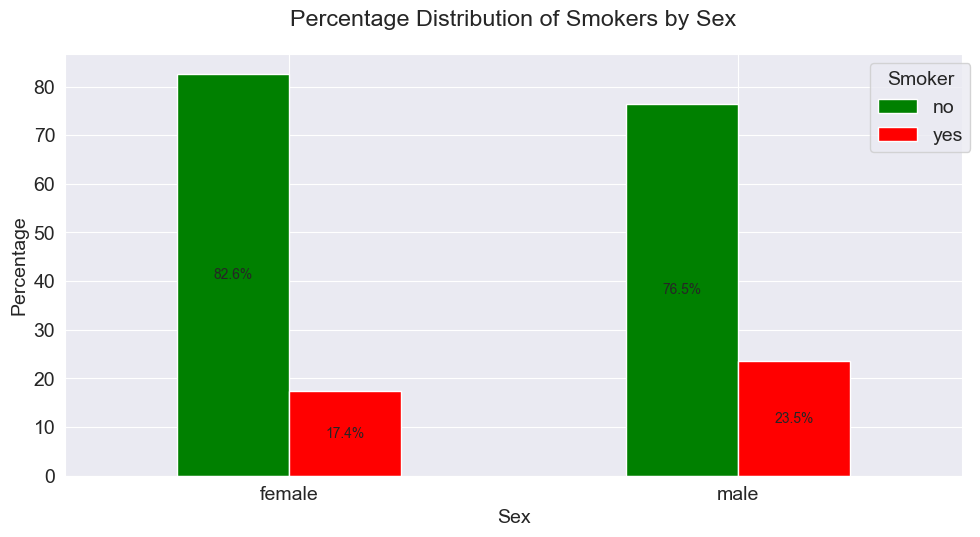

In [35]:
smoker_by_sex = medical_df.groupby(['sex', 'smoker']).size().unstack()
smoker_by_sex_pct = smoker_by_sex.div(smoker_by_sex.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
ax = smoker_by_sex_pct.plot(kind='bar', color=['green', 'red']) 
plt.title('Percentage Distribution of Smokers by Sex', pad=20)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Smoker', bbox_to_anchor=(1.02, 1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10)

plt.tight_layout()
plt.xticks(rotation=0)


There are 115 female smokers which make up for 17.4% of total female population.
Also there are 159 male smokers which make up for 23.54% of total male population.

In [36]:
grouped = medical_df.groupby(["region", "smoker"]).size().reset_index(name="count")
total_by_region = grouped.groupby("region")["count"].transform("sum")
grouped["percentage"] = (grouped["count"] / total_by_region) * 100

fig = px.bar(
    grouped,
    x="region",
    y="percentage",
    color="smoker",
    title="Percentage of Smokers by Region",
    labels={"percentage": "Percentage (%)", "region": "Region"},
    text="percentage"
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.update_layout(barmode="stack")

fig.show()


Looks like the Southeast region has the highest percentage of smokers.

### Bivariate Analysis

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

#### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points to see if can get some insights.

In [37]:
colors = {
    'yes': 'red',
    'no': 'green'
}
fig = px.scatter(medical_df,x='age',y='charges',color='smoker', opacity=0.8,hover_data=['sex'],title='Age vs. Charges',color_discrete_map = colors
)
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* Medical charges generally increase with age, but there is a lot of variation at each age. Age alone cannot accurately predict medical charges.

* There are three clusters forming lines with increasing slopes:

     1. The first and largest group likely consists of "healthy non-smokers" with relatively low medical charges. (bottom-most green layer)
     
     2. The second group is a mix of smokers and non-smokers. It might actually be two overlapping groups: "non-smokers with pre-existing medical issues" and "smokers without major medical issues".
     
     3. The third group consists only of smokers, likely those with major medical issues possibly related to smoking.


#### BMI and Charges

Let's visualize the relationship between BMI and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [38]:
colors = {
    'yes': 'red',
    'no': 'green'
}
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker', opacity=0.8,hover_data=['sex'],title='BMI vs. Charges',color_discrete_map = colors
)
fig.update_traces(marker_size=5)
fig.show()

From the above graph, we can gather the following insights:

1. **Smokers vs Non-Smokers**:
    - Smokers tend to have higher medical charges compared to non-smokers. This is evident from the red points (smokers) being generally higher on the y-axis compared to the green points (non-smokers).

2. **BMI and Charges**:
    - For non-smokers (green points), there doesn't seem to be a strong correlation between BMI and medical charges. The points are evenly spread out vertically for different BMI.
    - For smokers (red points), there is a noticeable increase in medical charges as BMI increases, especially for BMI values greater than 30. This suggests that higher BMI in smokers is associated with higher medical expenses.
3. **Outliers**:
    - There are some outliers with extremely high medical charges, which are mostly smokers with high BMI.

#### Sex and Charges

Let's visualize the relationship between Sex and charges using violin plot. A violin plot combines a box plot and a density plot to show the distribution of a continuous variable. It's width displays the data's density at different values (using a smooth curve) and includes the median, quartiles, and outliers. It's useful for comparing distributions across multiple groups.

In [39]:
colors = {
    'male': 'blue',
    'female': 'pink'
}
fig = px.violin(medical_df, x='sex', y='charges', color='sex', box=False,points='all', title='Distribution of Charges by Sex', color_discrete_map = colors)
fig.show()

From the Distribution of Charges by Sex, we can gather the following insights:

1. The distribution of charges appears wider for males compared to females.
2. Both distributions show a large concentration of charges at the lower end, but there are more high-charge outliers for males.

#### Region and Charges

Let's visualize the relationship between region and charges using violin plot.

In [40]:
fig = px.violin(medical_df, x='region', y='charges', color='region', box=False,points='all', title='Distribution of Charges by Region')
fig.show()

From the Distribution of Charges by Region, we can gather the following insights:

1. The Southeast region has the most widespread distribution, with a noticeable number of high-charge outliers.
2. The Southwest, Northwest, and Northeast regions have relatively similar distributions, but the Southwest shows fewer outliers.

#### Children and Charges

Let's visualize the relationship between Children and charges using violin plot.

In [41]:
fig = px.violin(medical_df, x='children', y='charges', color='children', box=False,points='all', title='Distribution of Charges by Number of Children')
fig.show()

From the Distribution of Charges by Number of Children, we can gather the following insights:

1. Families with 0 or 1 child seem to have a broader range of charges, including some high outliers.
2. As the number of children increases (4 or 5), the distributions narrow significantly, suggesting fewer high-charge cases.

### Correlation Analysis

As seen from the exploratory analysis, some columns are more closely related to "charges" than others. For example, "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is expressed numerically using the _correlation coefficient_, computed using the `.corr` method of a Pandas series.

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.
    * Values of -1 and 1 indicate a perfectly linear relationship.
    * A coefficient of zero represents no linear relationship.
    * Values between 0 and +1/-1 indicate a relationship, with strength increasing as r approaches -1 or 1.

* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.
    * Positive coefficients indicate that as one variable increases, the other also tends to increase.
    * Negative coefficients indicate that as one variable increases, the other tends to decrease.


In [42]:
medical_df['sex'] = medical_df['sex'].map({'male': 1, 'female': 0})
medical_df['smoker'] = medical_df['smoker'].map({'yes': 1, 'no': 0})

In [43]:
medical_df['charges'].corr(medical_df['bmi'])

np.float64(0.19834096883362887)

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [44]:
medical_df['charges'].corr(medical_df['age'])

np.float64(0.2990081933306478)

In [45]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [46]:
medical_df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [47]:
medical_df['charges'].corr(medical_df['smoker'])

np.float64(0.7872514304984778)

We can see that there is a high correaltion between being a smoker and higher charges

In [48]:
correlation_matrix = medical_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr()

correlation_matrix

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

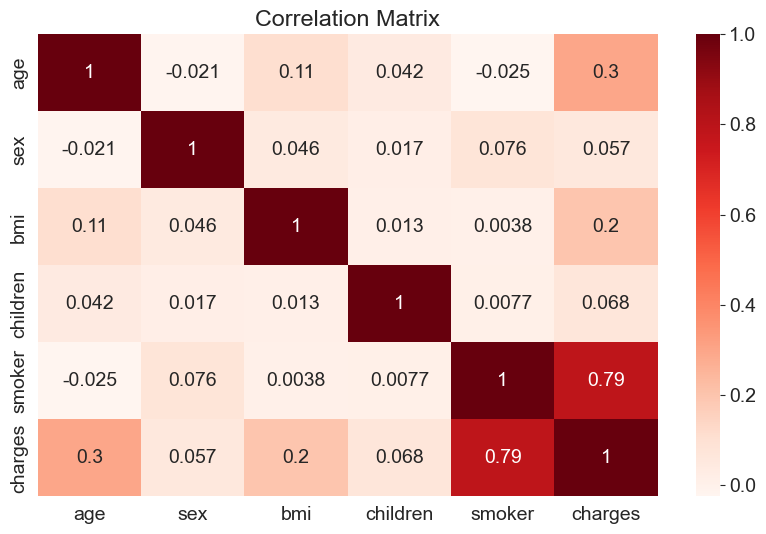

In [49]:
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix');

- Independent Variables: There is very weak correlation between the independent variables (age, bmi, children), indicating they are largely independent of each other.
- Independent vs Dependent (expenses): Age shows a moderate positive correlation with expenses (0.30), while BMI has a weak positive correlation (0.20), and children shows almost no correlation with expenses (0.07)

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$. The correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ and $Y$ simply appear to be correlated because the sample is too small. 

## 3. Modelling

### Feature Engineering

#### Handling Categorical Features
To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

In [50]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [51]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [52]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [53]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


#### Numerical Feature Scaling

Feature scaling is a critical preprocessing step in machine learning for several important reasons:

1. **Normalized Scale**: Ensures features are on a similar scale, making it easier for algorithms to compare them fairly.
2. **Algorithm Performance**: Improves the performance of many ML algorithms, such as gradient descent and k-means clustering.
3. **Benefits**: Prevents features with larger scales from dominating, reduces numerical instability, helps algorithms converge faster, and makes feature importance more comparable.
4. **When to Use**: Essential for gradient-based algorithms, distance-based algorithms (k-NN, k-means), and neural networks.

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [56]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [57]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [58]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

These can now we combined with the categorical data

In [59]:
cat_cols = ['smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [60]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

In [61]:
import pandas as pd

inputs
# Create column names based on the combined features
columns = ['age', 'bmi', 'children', 'smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']

# Convert inputs array to a pandas DataFrame
inputs_df = pd.DataFrame(inputs, columns=columns)
inputs_df.head()

,age,bmi,children,smoker,sex,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0


In [62]:
targets_df = pd.DataFrame(targets, columns=['charges'])
targets_df

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI


#### Check For Multi-Colinearity

In [63]:
# Compute VIF for each numerical feature

X = inputs_df[numeric_cols]
X = add_constant(X)  # Add a constant column for VIF calculation

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

    Feature       VIF
0     const  1.000000
1       age  1.013816
2       bmi  1.012152
3  children  1.001874


- The Variance Inflation Factor (VIF) values for all numerical features are close to 1, indicating no multicollinearity among the features.
- Multicollinearity is not an issue in this dataset, so no features need to be removed or combined.

### Creating a Test Set and Training Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [65]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1, random_state=42)

In [66]:
# 1. Define models and hyperparameter grids
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'Ridge': (Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'ElasticNet': (ElasticNet(), {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]})
}
results = {}

# 2. Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_model': best_model
    }

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Save results
    results[model_name]['metrics'] = {
        'r2_score': r2,
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    }

Training LinearRegression...
Training Lasso...
Training Ridge...
Training ElasticNet...


### Model Evaluation

In [67]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

comparison_df = pd.DataFrame()

for model_name, data in results.items():
    model_metrics = data['metrics']
    comparison_df[model_name] = pd.Series(model_metrics)

comparison_df

,LinearRegression,Lasso,Ridge,ElasticNet
r2_score,0.7660,0.7659,0.7663,0.7663
mean_squared_error,32275850.3509,32294827.4966,32246650.2859,32241326.6594
mean_absolute_error,4087.5343,4093.3728,4097.7918,4099.8759


In [68]:
# Transpose the DataFrame
transposed_df = comparison_df.T
transposed_df
# Find the model with the best value for each metric
best_metrics = {
    'r2_score': transposed_df['r2_score'].idxmax(),  # Higher is better for r2_score
    'mean_squared_error': transposed_df['mean_squared_error'].idxmin(),  # Lower is better for MSE
    'mean_absolute_error': transposed_df['mean_absolute_error'].idxmin()  # Lower is better for MAE
}

# Display the best models for each metric
for metric, model in best_metrics.items():
    print(f"The best model for {metric} is {model}.")

The best model for r2_score is ElasticNet.
The best model for mean_squared_error is ElasticNet.
The best model for mean_absolute_error is LinearRegression.


Observations:
- **r2_score**:
    - Ridge and ElasticNet tie with the highest r2_score (0.7663), which is slightly better than LinearRegression and Lasso.
- **mean_squared_error**:
    - ElasticNet has the lowest MSE (32,241,326.66), indicating better performance in minimizing large prediction errors.
    - Ridge follows closely.
- **mean_absolute_error**:
    - LinearRegression has the lowest MAE (4,087.53), indicating better performance in minimizing average prediction errors.

Conclusion:
- ElasticNet performs best in terms of MSE (which penalizes large errors more).
- Ridge also performs well across all metrics and might be a simpler alternative to ElasticNet.
- LinearRegression has the lowest MAE but slightly worse MSE and r2_score compared to Ridge and ElasticNet.

Final Recommendation:
- Go with ElasticNet for its overall balance of high r2_score, lowest MSE, and competitive MAE.